In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import scipy.stats
import statsmodels.api as stm
import pylab

In [4]:
df_day = pd.read_csv('day.csv')
df_hr = pd.read_csv('hour.csv')

In [5]:
a = df_day.loc[ (df_day['season'] == 2) & (df_day['workingday'] == 1) & df_hr['weathersit'].isin([3,4])]
len(a.index)

6

In [6]:
def data_preprocess(season_type):

    df = df_hr.loc[ (df_hr['season'] == season_type) & (df_hr['hr'].isin([16,17,18,19])) & (df_hr['workingday'] == 1)]
    df.reset_index(inplace= True,drop=True)
    df = df.groupby('dteday').sum()
    return df



Datasets

In [7]:
# Spring dataset 
df_spring = data_preprocess(season_type = 2)

# Summer dataset
df_summer = data_preprocess(season_type = 3)

In [10]:
def summary(data_type):
    return data_type['cnt'].describe().transpose()

summary(df_spring)

count     128.000000
mean     1811.242188
std       624.776429
min       237.000000
25%      1408.500000
50%      1822.000000
75%      2306.500000
max      3062.000000
Name: cnt, dtype: float64

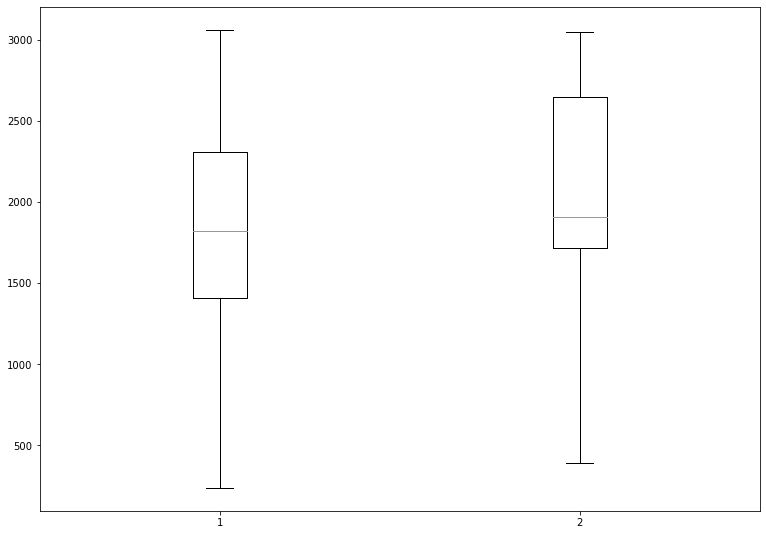

In [8]:
# Box plots bases on weather 
# For Spring dataset 
data = [df_spring['cnt'],df_summer['cnt']]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data)
plt.show()

In [11]:
def plot_hist_normal_density(data_type, season, axes):
    _ , bins, _ = axes.hist(data_type['cnt'],bins=15, density=True)
    mu = data_type['cnt'].mean()
    sigma = data_type['cnt'].std()
    axes.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=3, color='r')
    axes.set_xlabel('count intervals')
    axes.set_ylabel('Density')
    axes.set_title(f'Histogram for {season} data with normal distribution over it')


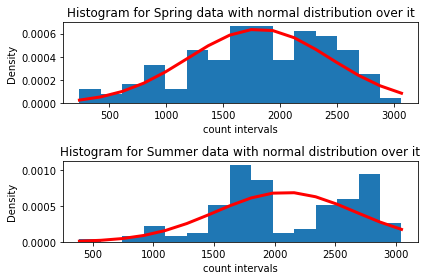

In [12]:
f, (ax1, ax2) = plt.subplots(2) 
plot_hist_normal_density(df_spring,'Spring',axes= ax1)
plot_hist_normal_density(df_summer,'Summer',axes= ax2)
plt.tight_layout()

Shipiro-Wilk Test: ShapiroResult(statistic=0.9710641503334045, pvalue=0.007652385160326958)


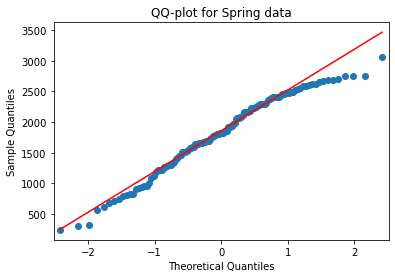

Kolmogorov-Smirnov test: KstestResult(statistic=1.0, pvalue=0.0)
Anderson-Darling test: AndersonResult(statistic=0.9756642131827675, critical_values=array([0.559, 0.637, 0.764, 0.892, 1.06 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [13]:
# Hypothesis testing for spring
# h0 = does follow normal.dist , h1 = doesn't follow normal.dist
# level = 0.05

# 1) using Shipiro-Wilk Test
# assumptions : small sample size (<2000), sample of one variable of continous data, only checks for normality 
test_statistic_1 = scipy.stats.shapiro(df_spring['cnt'])
print('Shipiro-Wilk Test:',test_statistic_1)
# QQ_plot = scipy.stats.probplot(df_spring['cnt'], dist="norm", plot=plt)
# test = np.random.normal(0,1, 1000)
stm.qqplot(df_spring['cnt'], line= 'q' )
pylab.title('QQ-plot for Spring data')
pylab.show()

# 2) using Kolmogorov-Smirnov test.  compare between theoretical cumulative distribution function and a samples’ cumulative distribution function.
# H0: Fs(x) is equal to F(x) 
# HA: Fs(x) is not equal to F(x)
# no assumptions 
test_statistic_2 = scipy.stats.kstest(df_spring['cnt'],'norm')
print('Kolmogorov-Smirnov test:',test_statistic_2)

# 3) using Anderson-Darling test
#Anderson-Darling test is much more sensitive to the tails of distribution, whereas Kolmogorov-Smirnov test is more aware of the center of distribution.
test_statistic_3 = scipy.stats.anderson(df_spring['cnt'],dist='norm')
print('Anderson-Darling test:',test_statistic_3)


Shipiro-Wilk Test: ShapiroResult(statistic=0.9436894059181213, pvalue=3.578056566766463e-05)


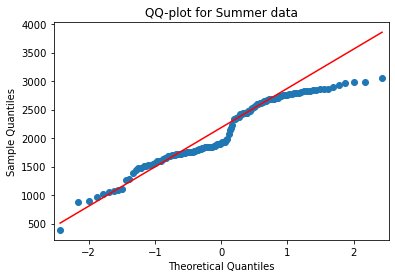

Kolmogorov-Smirnov test: KstestResult(statistic=1.0, pvalue=0.0)
Anderson-Darling test: AndersonResult(statistic=2.9516066473483704, critical_values=array([0.56 , 0.637, 0.765, 0.892, 1.061]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [15]:
# Hypothesis testing for spring
# h0 = does follow normal.dist , h1 = doesn't follow normal.dist
# level = 0.05

# 1) using Shipiro-Wilk Test
# assumptions : small sample size (<2000), sample of one variable of continous data, only checks for normality 
test_statistic_1 = scipy.stats.shapiro(df_summer['cnt'])
print('Shipiro-Wilk Test:',test_statistic_1)
# QQ_plot = scipy.stats.probplot(df_spring['cnt'], dist="norm", plot=plt)
# test = np.random.normal(0,1, 1000)
stm.qqplot(df_summer['cnt'], line= 'q' )
pylab.title('QQ-plot for Summer data')
pylab.show()


# 2) using Kolmogorov-Smirnov test.  compare between theoretical cumulative distribution function and a samples’ cumulative distribution function.
# H0: Fs(x) is equal to F(x) 
# HA: Fs(x) is not equal to F(x)
# no assumptions 
test_statistic_2 = scipy.stats.kstest(df_summer['cnt'],'norm')
print('Kolmogorov-Smirnov test:',test_statistic_2)

# 3) using Anderson-Darling test
#Anderson-Darling test is much more sensitive to the tails of distribution, whereas Kolmogorov-Smirnov test is more aware of the center of distribution.
test_statistic_3 = scipy.stats.anderson(df_summer['cnt'],dist='norm')
print('Anderson-Darling test:',test_statistic_3)
